In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

2024-04-22 21:38:56.287699: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 21:38:56.287823: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 21:38:56.413204: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [6]:

print("Class distribution:")
print(df['Class'].value_counts())


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


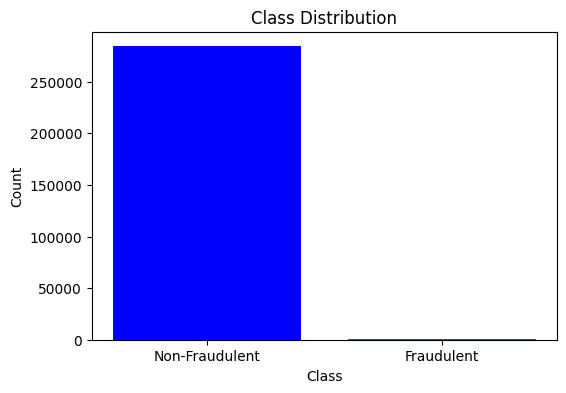

In [7]:

class_distribution = df['Class'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(class_distribution.index, class_distribution.values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)

# Amount and Time are Scaled!

df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## splitting data

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## random over sampling

In [11]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print(y_train_ros.value_counts())

Class
0    227451
1    227451
Name: count, dtype: int64


## SMOTE

In [12]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train_smote.value_counts())

Class
0    227451
1    227451
Name: count, dtype: int64


## neural network calssifer

In [13]:

# Neural network model
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
def Neural_network(input_shape):
    model = models.Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [14]:
#train on original data
# Train and evaluate the model on original data
model_original = Neural_network(X_train.shape[1])
model_original.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
 101/2849 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8397 - loss: 0.3977

I0000 00:00:1713821958.325953      76 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2849/2849 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9855 - loss: 0.0555 - val_accuracy: 0.9993 - val_loss: 0.0037
Epoch 2/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9992 - loss: 0.0062 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 3/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9992 - loss: 0.0054 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 4/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9992 - loss: 0.0044 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 5/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9993 - loss: 0.0043 - val_accuracy: 0.9992 - val_loss: 0.0034
Epoch 6/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9992 - loss: 0.0043 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 7/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 8/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accura

In [15]:
#train on data after random overSampling
model_ros = Neural_network(X_train_ros.shape[1])
model_ros.fit(X_train_ros, y_train_ros, epochs=10, batch_size=64, validation_split=0.2)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9303 - loss: 0.1849 - val_accuracy: 0.9953 - val_loss: 0.0307
Epoch 2/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9892 - loss: 0.0331 - val_accuracy: 1.0000 - val_loss: 0.0076
Epoch 3/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9937 - loss: 0.0207 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 4/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9945 - loss: 0.0183 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 5/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9952 - loss: 0.0164 - val_accuracy: 0.9978 - val_loss: 0.0110
Epoch 6/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9953 - loss: 0.0161 - val_accuracy: 1.0000 - val_loss: 0.0062
Epoch 7/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9959 - loss: 0.0133 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 8/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9960 - loss: 0

In [16]:
# train data after Smote
model_smote = Neural_network(X_train_smote.shape[1])
model_smote.fit(X_train_smote, y_train_smote, epochs=10, batch_size=64, validation_split=0.2)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9420 - loss: 0.1583 - val_accuracy: 0.9972 - val_loss: 0.0193
Epoch 2/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9927 - loss: 0.0240 - val_accuracy: 0.9996 - val_loss: 0.0082
Epoch 3/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9953 - loss: 0.0165 - val_accuracy: 0.9998 - val_loss: 0.0056
Epoch 4/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9959 - loss: 0.0149 - val_accuracy: 0.9995 - val_loss: 0.0039
Epoch 5/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9965 - loss: 0.0137 - val_accuracy: 0.9970 - val_loss: 0.0108
Epoch 6/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9967 - loss: 0.0126 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 7/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9969 - loss: 0.0118 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 8/10
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9971 - loss: 0

In [17]:
y_pred_original = model_original.predict(X_test)
y_pred_ros = model_ros.predict(X_test)
y_pred_smote = model_smote.predict(X_test)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


## evaluating

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


def evaluate_model(y_true, y_pred_proba, title):
    assert len(y_true) == len(y_pred_proba), "Arrays y_true and y_pred_proba must have the same length."
    
    y_pred_binary = (y_pred_proba > 0.5).astype(int)
    
    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    
    print(title + " Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    confusion_matrix = pd.crosstab(y_true, y_pred_binary.ravel(), rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
    plt.title(title + " Confusion Matrix")
    plt.show()
    
   

Original Data Metrics:
Accuracy: 0.999403110845827
Precision: 0.8809523809523809
Recall: 0.7551020408163265
F1-score: 0.8131868131868131


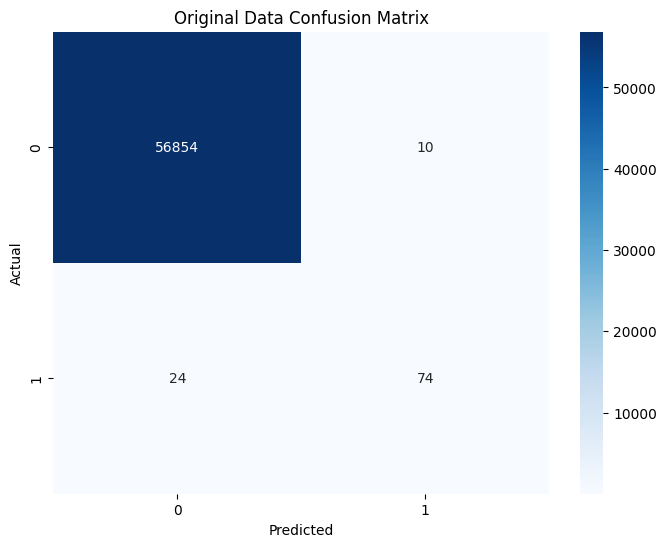

In [19]:

# Evaluate original data model
evaluate_model(y_test, y_pred_original, "Original Data")




Random Oversampling Metrics:
Accuracy: 0.9984024437344194
Precision: 0.5212121212121212
Recall: 0.8775510204081632
F1-score: 0.6539923954372623


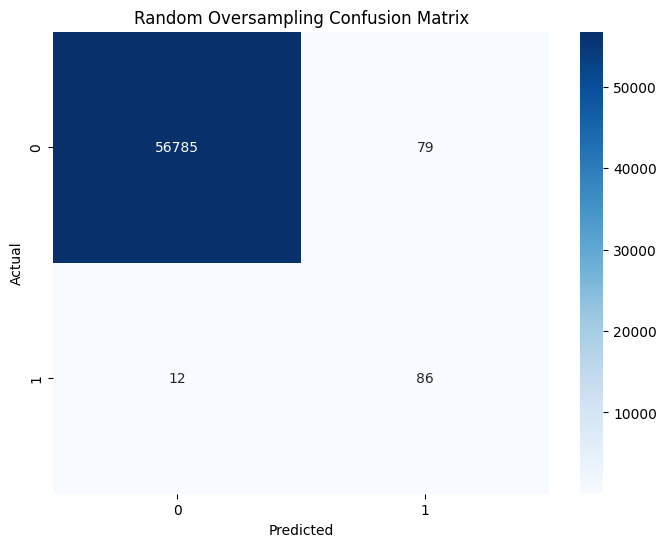

In [20]:
# Evaluate model after random oversampling
evaluate_model(y_test, y_pred_ros, "Random Oversampling")


SMOTE Metrics:
Accuracy: 0.9989466661985184
Precision: 0.6484375
Recall: 0.8469387755102041
F1-score: 0.7345132743362831


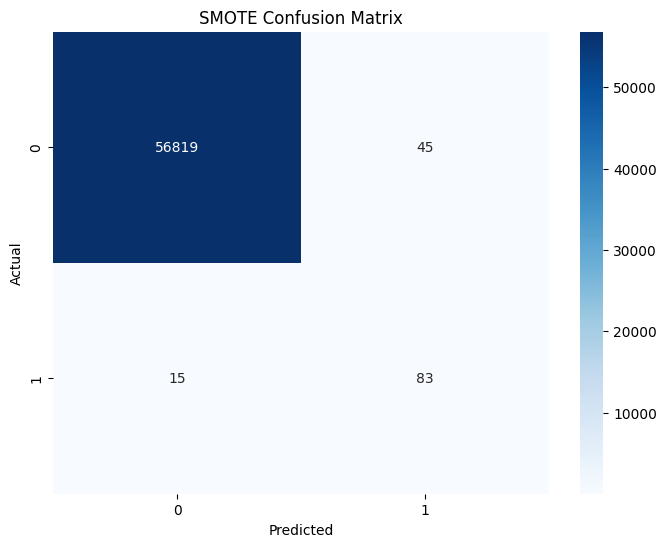

In [21]:
# Evaluate model after SMOTE
evaluate_model(y_test, y_pred_smote, "SMOTE")

# SVM

In [22]:
# from sklearn.svm import SVC

# # Initialize the SVM classifier
# svm_classifier = SVC(kernel='rbf', random_state=42)

# # Train the classifier on the original training data
# svm_classifier.fit(X_train, y_train)

# # Make predictions on the oriignal test data
# y_pred_orirginal2 = svm_classifier.predict(X_test)

In [23]:
# # Train the classifier on the  data after ROS
# # svm_classifier.fit(X_train_ros, y_train_ros)

# y_pred_ros2 = svm_classifier.predict(X_test)

In [24]:
# # Train the classifier on the  data after SMOTE
# svm_classifier.fit(X_train_smote, y_train_smote)

# y_pred_SMote2 = svm_classifier.predict(X_test)

In [25]:
# evaluate_model(y_test, y_pred_orirginal2, "original _SVM")

In [26]:
# evaluate_model(y_test, y_pred_ros2, "ROS_SVM")

In [27]:
# evaluate_model(y_test, y_pred_SMote2, "SMOTE_SVM")

# logistic regression


In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

In [29]:
# Train and evaluate the model on original data
log_reg.fit(X_train, y_train)
y_pred_log_reg_original = log_reg.predict(X_test)

In [30]:
log_reg_ros = LogisticRegression(max_iter=1000)
log_reg_ros.fit(X_train_ros, y_train_ros)
y_pred_log_reg_ros = log_reg_ros.predict(X_test)

In [31]:
# Train and evaluate the model after SMOTE
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)
y_pred_log_reg_smote = log_reg_smote.predict(X_test)

original_L_R Metrics:
Accuracy: 0.9991222218320986
Precision: 0.8636363636363636
Recall: 0.5816326530612245
F1-score: 0.6951219512195121


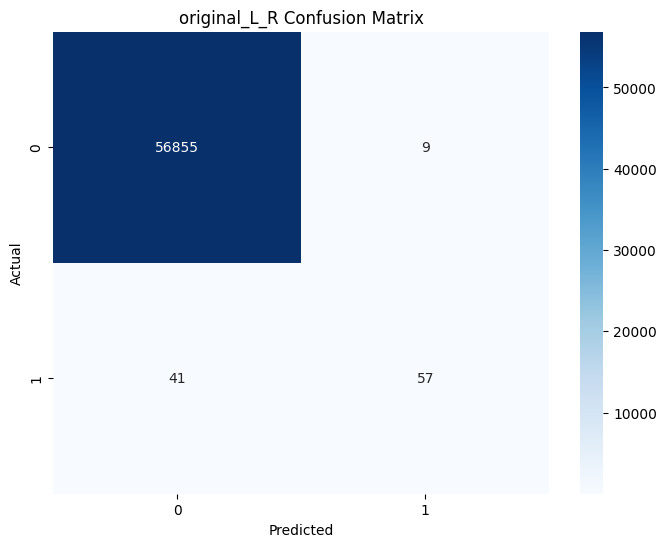

In [32]:
 evaluate_model(y_test, y_pred_log_reg_original, "original_L_R")

ROS_L_R Metrics:
Accuracy: 0.9757206558758471
Precision: 0.06143344709897611
Recall: 0.9183673469387755
F1-score: 0.11516314779270632


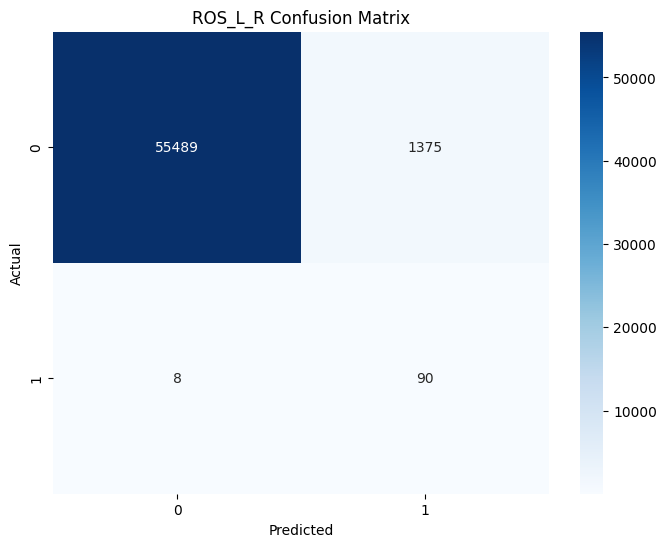

In [33]:
evaluate_model(y_test, y_pred_log_reg_ros, "ROS_L_R")

SMOTE_L_R Metrics:
Accuracy: 0.9742459885537726
Precision: 0.058102001291155586
Recall: 0.9183673469387755
F1-score: 0.1092896174863388


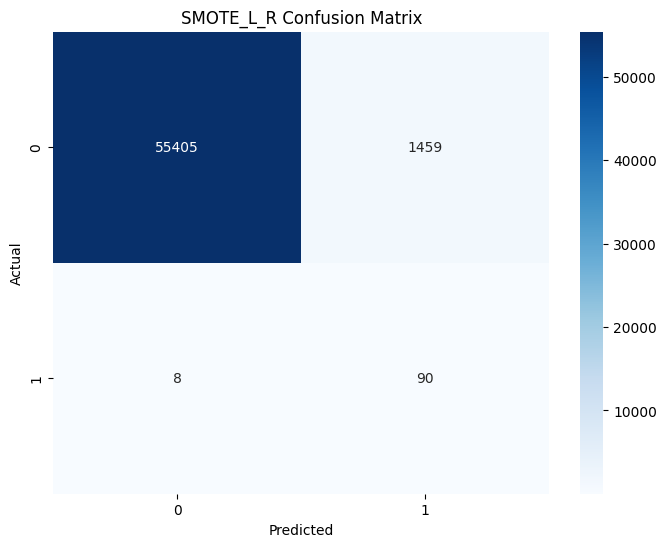

In [34]:
evaluate_model(y_test, y_pred_log_reg_smote, "SMOTE_L_R")